In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [2]:
# loading the csv data to a Pandas DataFrame
tfr_data=pd.read_csv('Health index.csv')

In [3]:
print(f'The dataset has {tfr_data.shape[0]} rows and {tfr_data.shape[1]} columns')

The dataset has 470 rows and 15 columns


In [4]:
Condition = []
for row in tfr_data['HI']:
    if row > 85 and row <=100:
        Condition.append('Very Good')
    elif row > 70 and row <=85:
        Condition.append('Good')
    elif row > 50 and row <=70:
        Condition.append('Fair')
    elif row > 30 and row <=50:
        Condition.append('Poor')
    elif row >=0 and row <=30:
        Condition.append('Very Poor')
    else:
        Condition.append(Nan)

In [5]:
tfr_data['Condition'] = Condition

In [6]:
tfr_data.head()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,PF,IV,DR,WC,HI,Condition
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2,Very Good
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,85.5,Very Good
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,85.3,Very Good
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,85.3,Very Good
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,85.2,Very Good


In [7]:
tfr_data.tail()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,PF,IV,DR,WC,HI,Condition
465,15,227,52900,3,60,853,3,84,0,0.0,1.00,32,56,28,13.4,Very Poor
466,15,334,47100,3,64,622,3,108,0,0.0,1.00,32,55,12,13.4,Very Poor
467,15,1280,35000,2,675,2530,0,0,0,5.0,0.30,45,58,8,13.4,Very Poor
468,15,169,50600,5,77,532,0,72,0,0.0,1.21,33,54,11,13.4,Very Poor
469,15,308,39700,3,64,581,5,27,0,0.0,1.00,32,60,18,13.4,Very Poor


In [8]:
tfr_data.drop(columns=['HI'],axis=1,inplace=True)

In [9]:
tfr_data.head()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,PF,IV,DR,WC,Condition
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,Very Good
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,Very Good
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,Very Good
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,Very Good
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,Very Good


In [10]:
tfr_data['Condition'].value_counts()

Very Poor    285
Poor         135
Fair          41
Very Good      5
Good           4
Name: Condition, dtype: int64

# Data Preprocessing

In [11]:
# Missing Values
tfr_data.isnull().sum()

Hydrogen      0
Oxigen        0
Nitrogen      0
Methane       0
CO            0
CO2           0
Ethylene      0
Ethane        0
Acethylene    0
DBDS          0
PF            0
IV            0
DR            0
WC            0
Condition     0
dtype: int64

No null values

In [12]:
tfr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hydrogen    470 non-null    int64  
 1   Oxigen      470 non-null    int64  
 2   Nitrogen    470 non-null    int64  
 3   Methane     470 non-null    int64  
 4   CO          470 non-null    int64  
 5   CO2         470 non-null    int64  
 6   Ethylene    470 non-null    int64  
 7   Ethane      470 non-null    int64  
 8   Acethylene  470 non-null    int64  
 9   DBDS        470 non-null    float64
 10  PF          470 non-null    float64
 11  IV          470 non-null    int64  
 12  DR          470 non-null    int64  
 13  WC          470 non-null    int64  
 14  Condition   470 non-null    object 
dtypes: float64(2), int64(12), object(1)
memory usage: 55.2+ KB


In [13]:
tfr_data.describe()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,PF,IV,DR,WC
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,404.261702,8357.372340,47759.561702,79.695745,244.000000,1816.414894,162.923404,81.940426,91.491489,17.036596,1.849043,38.434043,53.495745,16.282979
std,2002.142678,14164.233283,13760.451816,489.320336,237.267485,2256.790519,1323.811504,342.573636,644.365828,46.735057,6.144009,6.178830,6.458906,17.115646
min,0.000000,57.000000,3600.000000,0.000000,10.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.050000,21.000000,27.000000,0.000000
25%,4.000000,496.000000,41700.000000,2.000000,66.000000,641.750000,0.000000,0.000000,0.000000,0.000000,0.570000,32.000000,51.000000,5.000000
50%,9.000000,3810.000000,49100.000000,3.000000,150.500000,1125.000000,3.000000,4.000000,0.000000,0.000000,1.000000,39.000000,54.000000,12.000000
75%,34.000000,14875.000000,55875.000000,7.000000,361.750000,2257.500000,6.000000,69.750000,0.000000,2.000000,1.000000,44.000000,56.000000,21.000000
max,23349.000000,249900.000000,85300.000000,7406.000000,1730.000000,24900.000000,16684.000000,5467.000000,9740.000000,227.000000,73.200000,57.000000,75.000000,183.000000


In [14]:
df2=tfr_data.drop(columns=["CO","CO","Ethylene","Ethane","Acethylene","DBDS","PF","IV","DR","WC", "Condition"])
df2

,Hydrogen,Oxigen,Nitrogen,Methane,CO2
0,2845,5860,27842,7406,1344
1,12886,61,25041,877,864
2,2820,16400,56300,144,1080
3,1099,70,37520,545,1402
4,3210,3570,47900,160,2130
...,...,...,...,...,...
465,15,227,52900,3,853
466,15,334,47100,3,622
467,15,1280,35000,2,2530
468,15,169,50600,5,532


# Exploratory data analysis

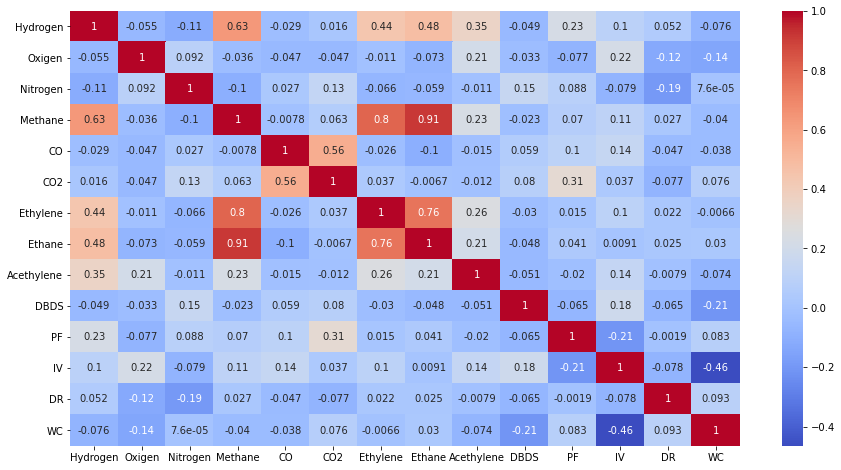

In [15]:
corrmat=tfr_data.corr()
ind=corrmat.index
plt.figure(figsize=(15,8))
sns.heatmap(tfr_data[ind].corr(),annot=True,cmap='coolwarm')
plt.show()

<AxesSubplot:xlabel='Condition', ylabel='Count'>

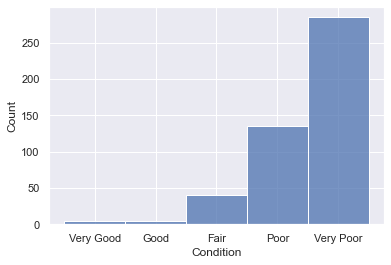

In [16]:
sns.set_theme(style='darkgrid')
sns.histplot(x='Condition',data=tfr_data,stat='count',bins=10)

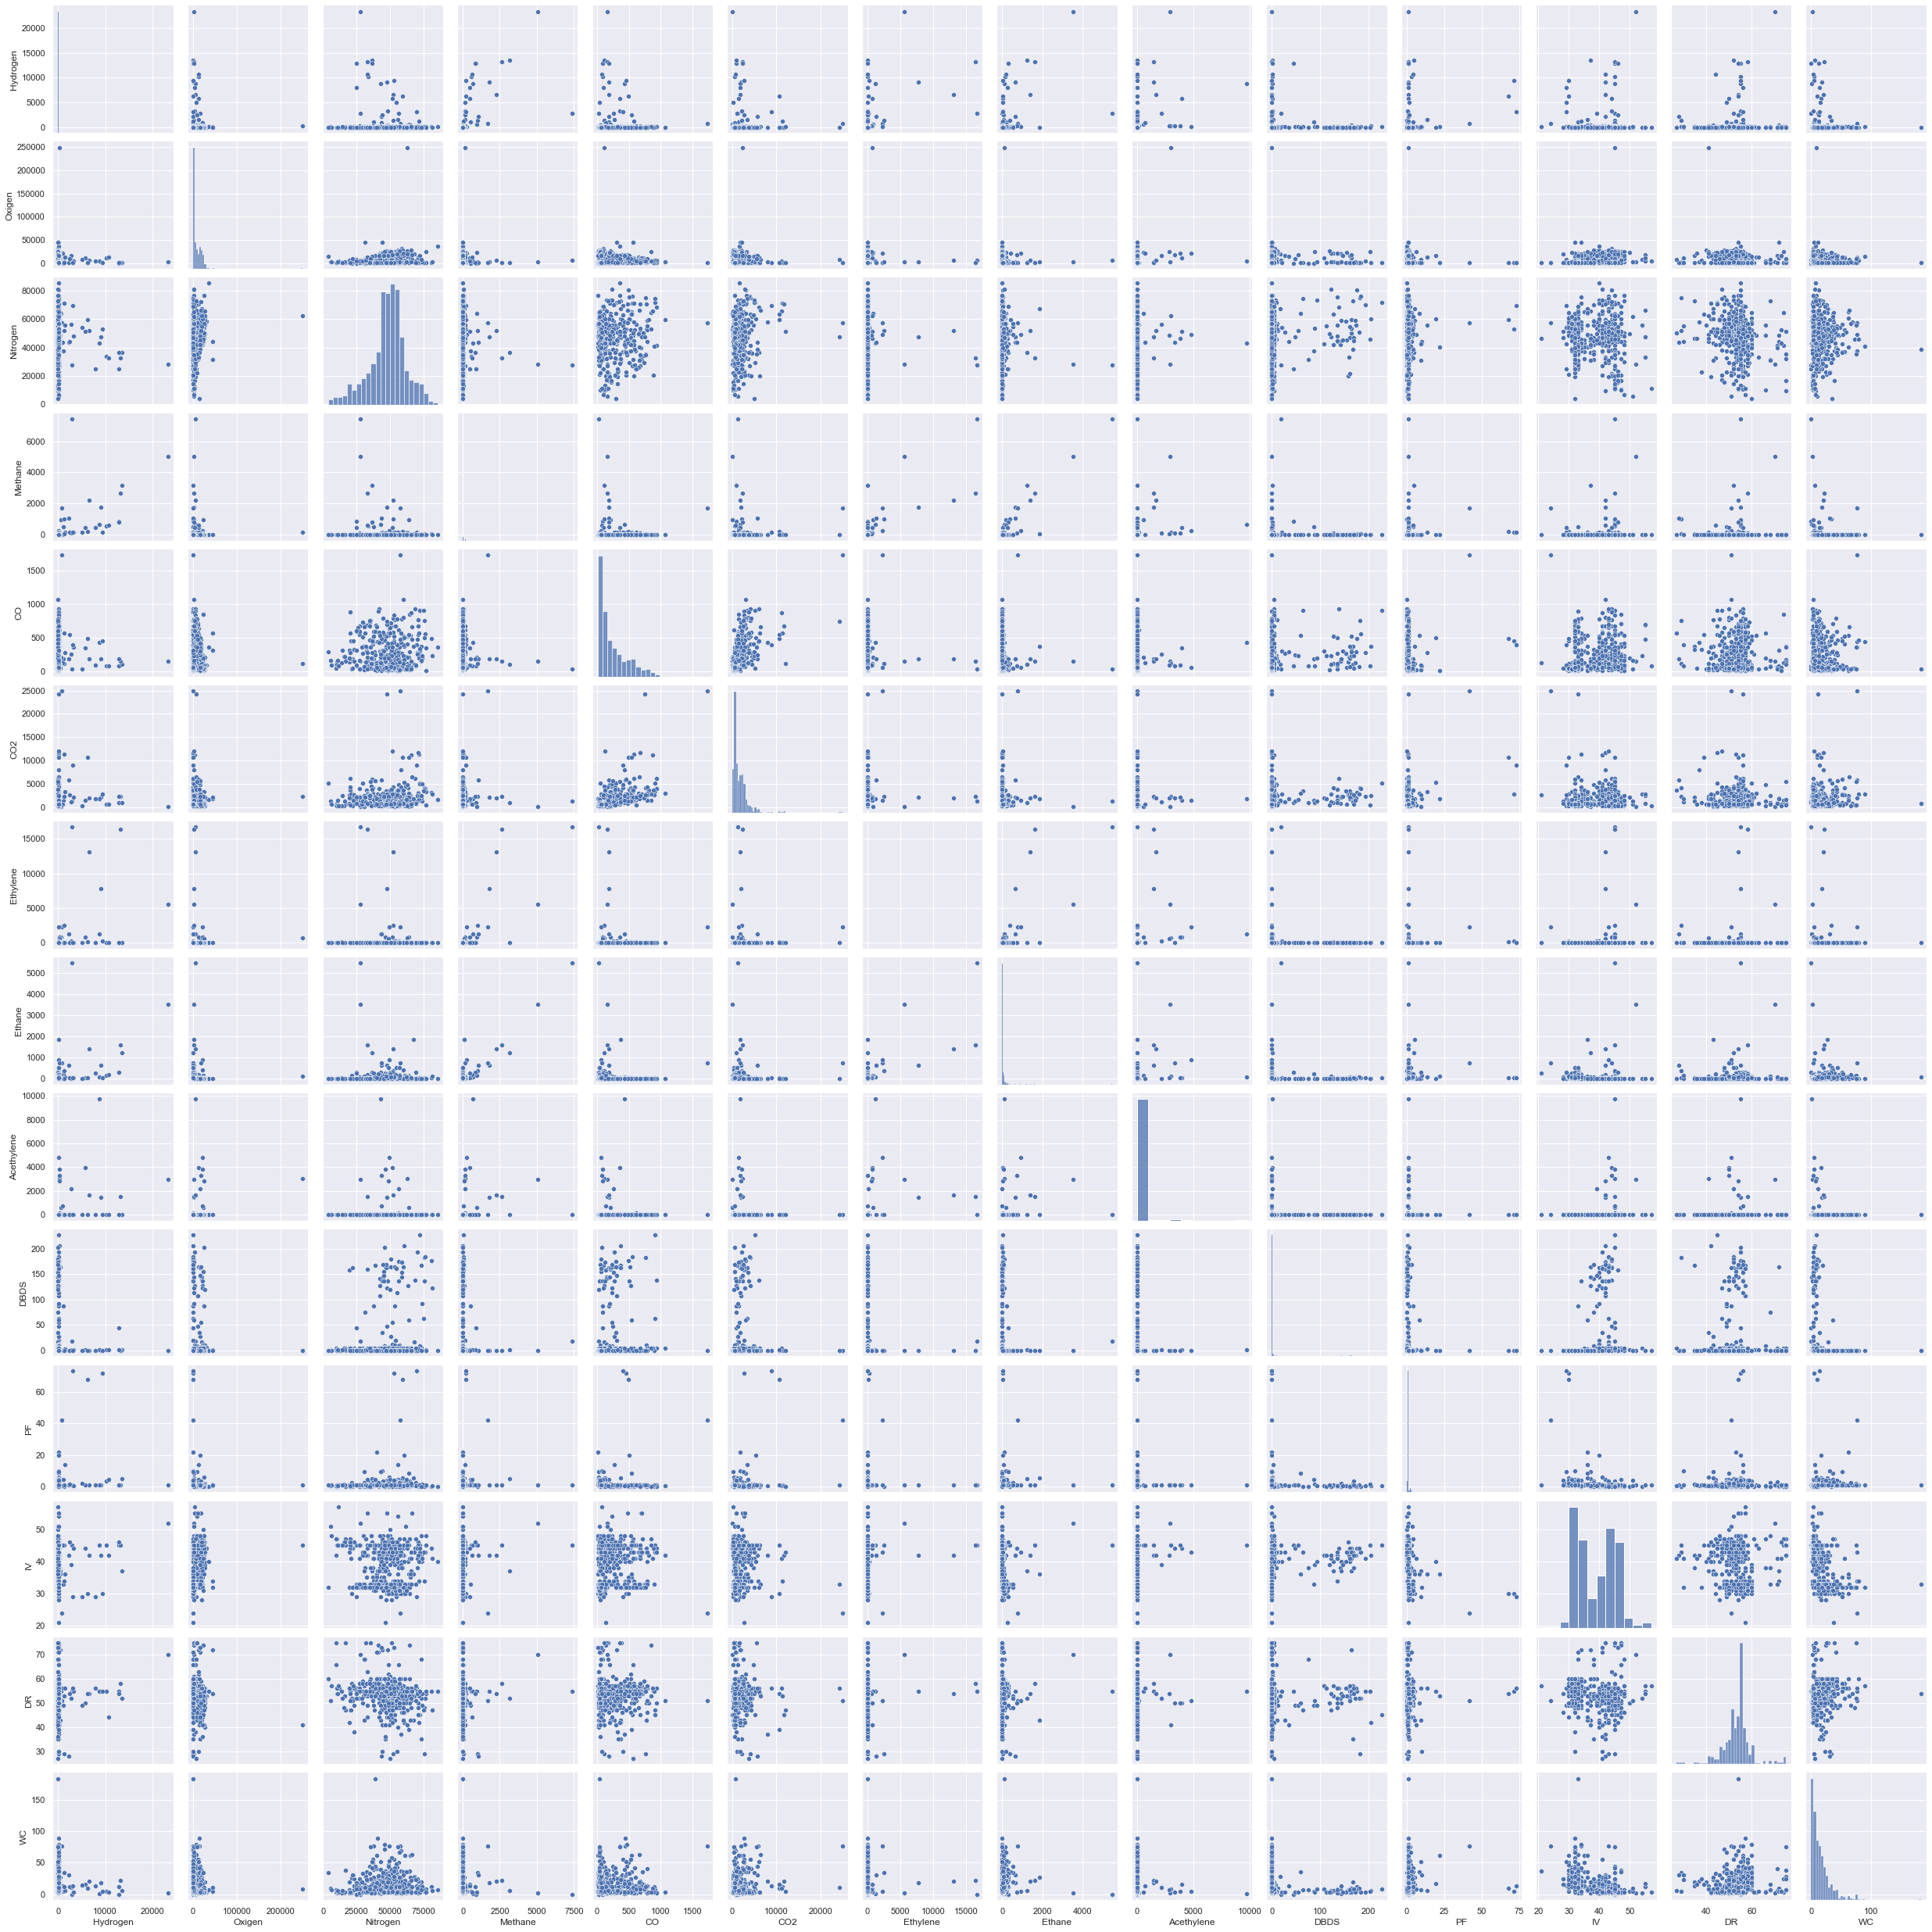

In [17]:
sns.pairplot(tfr_data)

In [18]:
# Encoding Concept
tfr_data['Condition'] = tfr_data['Condition'].astype('category')
tfr_data['Condition'] = tfr_data['Condition'].cat.codes

In [19]:
tfr_data.head()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,PF,IV,DR,WC,Condition
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,3
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,3
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,3
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,3
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,3


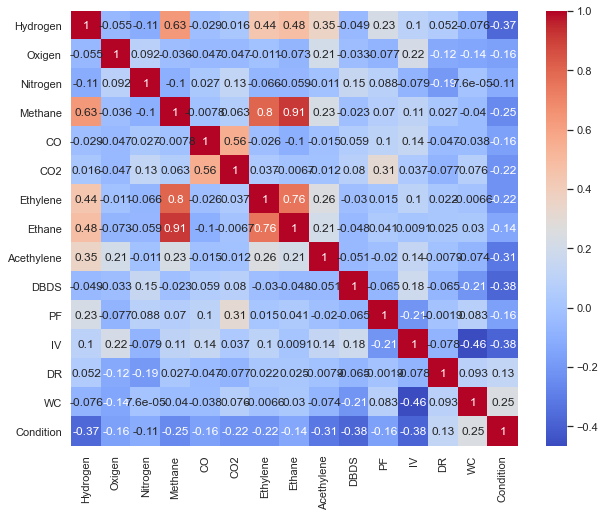

In [20]:
corrmat2=tfr_data.corr()
ind2=corrmat2.index
plt.figure(figsize=(10,8))
sns.heatmap(tfr_data[ind2].corr(),annot=True,cmap='coolwarm')
plt.show()

In [21]:
# Handling Imbalance data
tfr_data['Condition'].value_counts()

4    285
2    135
0     41
3      5
1      4
Name: Condition, dtype: int64

In [22]:
# separating the independent and dependent variables
x = tfr_data.iloc[:,:-1]
y = tfr_data.iloc[:,-1]

In [23]:
x.head()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,PF,IV,DR,WC
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3


In [24]:
y.tail()

465    4
466    4
467    4
468    4
469    4
Name: Condition, dtype: int8

In [25]:
! pip install imblearn

In [40]:
from imblearn.over_sampling import RandomOverSampler
over=RandomOverSampler()
x_over,y_over=over.fit_resample(x,y)

In [41]:
x_over.shape

(1425, 14)

In [42]:
y_over.shape

(1425,)

In [29]:
y_over.value_counts()

4    285
3    285
2    285
1    285
0    285
Name: Condition, dtype: int64

In [43]:
# Splitting data into train and test data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,train_size=0.75,random_state=101)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1068, 14)
(357, 14)
(1068,)
(357,)


# Logistic Regression Model

In [44]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(x_train,y_train)

C:\Users\iibm\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_pred_train_logit = logit.predict(x_train)
y_pred_test_logit = logit.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

print("Accuracy score of training dataset:",accuracy_score(y_train,y_pred_train_logit))
print("Accuracy score of test dataset:",accuracy_score(y_test,y_pred_test_logit))
print("precision_score of test dataset:",f1_score(x_train , x_))

In [34]:
 input_data = (22,1220,49900,3,30,813,5,291,0,0,1,32,57,27)


# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = logit.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 5):
    print('Very Good Condition')
    print('No maitenance')
elif (prediction[0]== 4):
    print('Good Condition')
    print('Normal maitenance')
elif (prediction[0]== 3):
    print('fair')
    print('Increase diagonostic testing, Possible remedial work or replacement needed depending on criticality')
elif (prediction[0]== 2):
    print('Poor')
    print('Start planning process to replace or rebuild considering risk and consiqunce of failure')
else:
    print('Poor')
    print('Imediatly assess risk, Replace or rebuild based on assessment')

[4]
Good Condition
Normal maitenance


C:\Users\iibm\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Support Vector Machine

In [35]:
#Support Vector Machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)

svc_train = round(svc.score(x_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")


Training Accuracy    : 50.47 %
Model Accuracy Score : 52.38 %


# Random Forest Model

In [36]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=32)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=32)

In [37]:
y_pred_train_rf=rf.predict(x_train)
y_pred_test_rf=rf.predict(x_test)

# XGBoost Model

In [48]:
!pip install xgboost

In [49]:
#XGBoost Model
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [51]:
y_pred_train_xgb=xgb.predict(x_train)
y_pred_test_xgb=xgb.predict(x_test)

In [52]:
print("Accuracy score of training dataset:",accuracy_score(y_train,y_pred_train_xgb))
print("Accuracy score of test dataset:",accuracy_score(y_test,y_pred_test_xgb))

Accuracy score of training dataset: 1.0
Accuracy score of test dataset: 0.9467787114845938


In [53]:
prediction=xgb.predict(x_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        69
           2       0.93      0.82      0.87        79
           3       1.00      1.00      1.00        66
           4       0.81      0.92      0.86        64

    accuracy                           0.95       357
   macro avg       0.95      0.95      0.95       357
weighted avg       0.95      0.95      0.95       357



In [54]:
import pickle

# Dump the 'model' variable into a file
filename = 'pa.sav'
pickle.dump(xgb, open(filename, 'wb'))

In [57]:
k=pd.read_csv('Test.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Test.csv'

In [ ]:
k

In [ ]:
k.iloc[0]

In [ ]:
k.iloc[0][1]

In [ ]:
i=k.drop(columns=["HI"])

In [ ]:
i

In [ ]:

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(i)

# reshape the numpy array as we are predicting for only on instance
input_data1_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = logit.predict(input_data1_reshaped)
print(prediction)

if (prediction[0]== 5):
    print('Very Good Condition')
    print('No maitenance')
elif (prediction[0]== 4):
    print('Good Condition')
    print('Normal maitenance')
elif (prediction[0]== 3):
    print('fair')
    print('Increase diagonostic testing, Possible remedial work or replacement needed depending on criticality')
elif (prediction[0]== 2):
    print('Poor')
    print('Start planning process to replace or rebuild considering risk and consiqunce of failure')
else:
    print('Poor')
    print('Imediatly assess risk, Replace or rebuild based on assessment')